In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("bmi.csv")

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
#male -1
#female - 0
#alphabetically

In [5]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [6]:
#outlier counts
for k, v in df.items():
    if df[k].dtype == 'object':
        continue 
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v < q1 - 1.5 * irq) | (v > q3 + 1.5 * irq)]
    num_outliers = len(v_col)
    print(f"Column '{k}' has {num_outliers} outliers")


Column 'Gender' has 0 outliers
Column 'Height' has 0 outliers
Column 'Weight' has 0 outliers
Column 'Index' has 0 outliers


In [7]:
X =df.drop('Index',axis =1)
X.head()

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61


In [8]:
y= df['Index']
y.head()

0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64

In [14]:
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [9]:
X =df.drop('Index',axis =1)
y= df['Index']
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("X train",X_train.shape)
print("y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (400, 3)
y train (400,)
X test (100, 3)
y test (100,)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, predictions))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9375
Accuracy on test set: 0.94


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9449556727639995
Accuracy on test set: 0.94


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],  # Experiment with more values as needed
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly'
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Evaluate the best model found by GridSearchCV on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, predictions))


Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validated score: 0.9425000000000001
Accuracy on test set: 0.94


In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']
}

# List of CV values to test
cv_values = [3, 5, 10, 15]
results = {}

# Loop through different CV values
for cv in cv_values:
    # Initialize the SVM model
    svm = SVC()
    
    # Create GridSearchCV with the current CV value
    grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', verbose=1)
    
    # Fit the model
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters and score for each CV value
    results[cv] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Print the results for all CV values
for cv, result in results.items():
    print(f"CV: {cv}, Best parameters: {result['best_params']}, Best cross-validated score: {result['best_score']:.4f}")

# Evaluate the best model found with the optimal CV value on the test set
# Here you might want to select the optimal CV value based on the highest score
optimal_cv = max(results, key=lambda x: results[x]['best_score'])
best_params = results[optimal_cv]['best_params']

# Train the final model with the best parameters found
final_model = SVC(**best_params)
final_model.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
predictions = final_model.predict(X_test_scaled)
print("Accuracy on test set with optimal CV:", accuracy_score(y_test, predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 15 folds for each of 72 candidates, totalling 1080 fits


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


CV: 3, Best parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9450
CV: 5, Best parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9375
CV: 10, Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9425
CV: 15, Best parameters: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9349
Accuracy on test set with optimal CV: 0.94


In [17]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of parameters for GridSearch
param_grid = {
    'C': [0.0001,0.001,0.01,0.1, 1, 10, 100,1000,10000],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Relevant for poly kernel
    'gamma': ['scale', 'auto']
}

# List of CV values to test
cv_values = [3, 5, 10, 15]
results = {}

# Loop through different CV values
for cv in cv_values:
    # Initialize the SVM model
    svm = SVC()
    
    # Create GridSearchCV with the current CV value
    grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', verbose=1)
    
    # Fit the model
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters and score for each CV value
    results[cv] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

# Print the results for all CV values
for cv, result in results.items():
    print(f"CV: {cv}, Best parameters: {result['best_params']}, Best cross-validated score: {result['best_score']:.4f}")

# Evaluate the best model found with the optimal CV value on the test set
# Here you might want to select the optimal CV value based on the highest score
optimal_cv = max(results, key=lambda x: results[x]['best_score'])
best_params = results[optimal_cv]['best_params']

# Train the final model with the best parameters found
final_model = SVC(**best_params)
final_model.fit(X_train_scaled, y_train)

# Predict and evaluate on the test set
predictions = final_model.predict(X_test_scaled)
print("Accuracy on test set with optimal CV:", accuracy_score(y_test, predictions))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 10 folds for each of 162 candidates, totalling 1620 fits
Fitting 15 folds for each of 162 candidates, totalling 2430 fits


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 12 members, which is less than n_splits=15.
  % (min_groups, self.n_splits)), UserWarning)


CV: 3, Best parameters: {'C': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9500
CV: 5, Best parameters: {'C': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9500
CV: 10, Best parameters: {'C': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9450
CV: 15, Best parameters: {'C': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Best cross-validated score: 0.9400
Accuracy on test set with optimal CV: 0.95


In [18]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validated score: 0.8724999999999999


In [19]:

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN model
knn = KNeighborsClassifier()

# List of CV values to test
cv_values = [3, 5, 10]

# Loop through each CV value
for cv in cv_values:
    print(f"Using CV = {cv}")
    
    # Create the GridSearchCV object with the current cv value
    grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='accuracy', verbose=1)

    # Fit the model
    grid_search.fit(X_train_scaled, y_train)

    # Output the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validated score:", grid_search.best_score_)

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(X_test_scaled, y_test)
    print("Test set accuracy:", test_accuracy)
    print("--------------------------------------------------")

Using CV = 3
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validated score: 0.8324916769535781
Test set accuracy: 0.9
--------------------------------------------------
Using CV = 5
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validated score: 0.8724999999999999
Test set accuracy: 0.88
--------------------------------------------------
Using CV = 10
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validated score: 0.8825
Test set accuracy: 0.9
--------------------------------------------------


In [1]:
df

NameError: name 'df' is not defined

In [11]:
# --------sampling

In [27]:
df['Index'].value_counts()

Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64

In [28]:
##NOSMAPLING

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression without resampling
model_baseline = LogisticRegression(random_state=42)
model_baseline.fit(X_train, y_train)

# Predictions and evaluation
y_pred_baseline = model_baseline.predict(X_test)
print("Baseline Model (No Resampling)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline, zero_division=0))
y_pred_train_baseline = model_baseline.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train_baseline)
test_accuracy = accuracy_score(y_test, y_pred_baseline)
print(train_accuracy)
print(test_accuracy)
if train_accuracy - test_accuracy > 0.1:  # You can adjust the threshold as needed
    print("Warning: Possible overfitting detected!")
else:
    print("Model does not appear to be overfitting.")

Baseline Model (No Resampling)
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  2  5  1  0]
 [ 0  0  0  6 20  4]
 [ 0  0  0  0  5 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.50      0.50         4
           2       0.80      0.89      0.84        18
           3       0.45      0.62      0.53         8
           4       0.77      0.67      0.71        30
           5       0.89      0.87      0.88        39

    accuracy                           0.78       100
   macro avg       0.74      0.76      0.74       100
weighted avg       0.79      0.78      0.78       100

0.7475
0.78
Model does not appear to be overfitting.


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

# Train Logistic Regression on resampled data
model_over = LogisticRegression(random_state=42)
model_over.fit(X_resampled, y_resampled)

# Predictions and evaluation
y_pred_over = model_over.predict(X_test)
print("Random Oversampling")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over, zero_division=0))

y_pred_train_baseline = model_baseline.predict(X_train)
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train_baseline)
test_accuracy = accuracy_score(y_test, y_pred_over)
print(train_accuracy)
print(test_accuracy)
if train_accuracy > test_accuracy :  # You can adjust the threshold as needed
    print("Warning: Possible overfitting detected!")
else:
    print("Model does not appear to be overfitting.")


Resampled class distribution:
 Index
4    159
5    159
2    159
3    159
1    159
0    159
Name: count, dtype: int64
Random Oversampling
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 15  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  9 18  3]
 [ 0  0  0  0  6 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.57      1.00      0.73         4
           2       0.88      0.83      0.86        18
           3       0.40      0.75      0.52         8
           4       0.75      0.60      0.67        30
           5       0.92      0.85      0.88        39

    accuracy                           0.77       100
   macro avg       0.75      0.84      0.78       100
weighted avg       0.81      0.77      0.78       100

0.7475
0.77
Model does not appear to be overfitting.


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

# Train Logistic Regression on resampled data
model_under = LogisticRegression(random_state=42)
model_under.fit(X_resampled, y_resampled)

# Predictions and evaluation
y_pred_under = model_under.predict(X_test)
print("Random Undersampling")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under, zero_division=0))


y_pred_train_baseline = model_baseline.predict(X_train)
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train_baseline)
test_accuracy = accuracy_score(y_test, y_pred_under)
print(train_accuracy)
print(test_accuracy)
if train_accuracy - test_accuracy > 0.1:  # You can adjust the threshold as needed
    print("Warning: Possible overfitting detected!")
else:
    print("Model does not appear to be overfitting.")


Resampled class distribution:
 Index
0    12
1    12
2    12
3    12
4    12
5    12
Name: count, dtype: int64
Random Undersampling
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  3 15  0  0  0]
 [ 0  0  3  5  0  0]
 [ 0  0  2  7 15  6]
 [ 0  0  0  0  5 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.57      1.00      0.73         4
           2       0.75      0.83      0.79        18
           3       0.42      0.62      0.50         8
           4       0.75      0.50      0.60        30
           5       0.85      0.87      0.86        39

    accuracy                           0.74       100
   macro avg       0.72      0.81      0.75       100
weighted avg       0.76      0.74      0.74       100

0.7475
0.74
Model does not appear to be overfitting.


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

# Train Logistic Regression on SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Predictions and evaluation
y_pred_smote = model_smote.predict(X_test)
print("SMOTE")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, zero_division=0))


Resampled class distribution:
 Index
4    159
5    159
2    159
3    159
1    159
0    159
Name: count, dtype: int64
SMOTE
Confusion Matrix:
 [[ 1  0  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  2 16  0  0  0]
 [ 0  0  2  6  0  0]
 [ 0  0  0  8 19  3]
 [ 0  0  0  0  7 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.60      0.75      0.67         4
           2       0.84      0.89      0.86        18
           3       0.43      0.75      0.55         8
           4       0.73      0.63      0.68        30
           5       0.91      0.82      0.86        39

    accuracy                           0.77       100
   macro avg       0.75      0.81      0.77       100
weighted avg       0.80      0.77      0.78       100



C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
import pandas as pd

# Function to collect results
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    return {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall']
    }

# Collect metrics for all models
results = [
    get_metrics(y_test, y_pred_baseline, 'Baseline (No Resampling)'),
    get_metrics(y_test, y_pred_over, 'Random Oversampling'),
    get_metrics(y_test, y_pred_under, 'Random Undersampling'),
    get_metrics(y_test, y_pred_smote, 'SMOTE')
]

# Create DataFrame for comparison
df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,F1-Score (Weighted),Precision (Weighted),Recall (Weighted)
0,Baseline (No Resampling),0.78,0.782386,0.790080,0.78
1,Random Oversampling,0.77,0.778316,0.806181,0.77
2,Random Undersampling,0.74,0.736892,0.757690,0.74
3,SMOTE,0.77,0.776847,0.795667,0.77


In [25]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Overfitting detection: Compare train and test accuracies
if train_accuracy > test_accuracy + 0.10:  # 10% threshold for large performance gap
    print("Potential Overfitting Detected!")
else:
    print("No significant overfitting.")

NameError: name 'train_predictions' is not defined

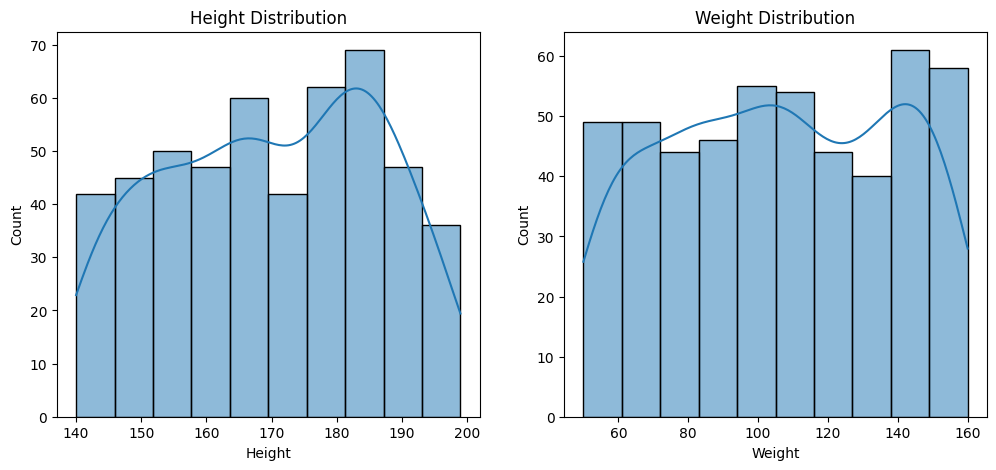

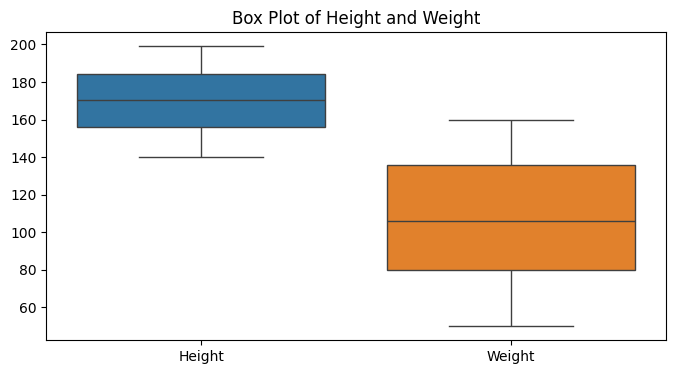

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()

# Box Plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Height', 'Weight']])
plt.title('Box Plot of Height and Weight')
plt.show()


In [36]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 1.        , -0.56559786, -0.52781773],
       [ 1.        ,  0.52179989,  0.64786069],
       [ 1.        ,  0.09892299,  1.01912756],
       ...,
       [ 1.        ,  0.46138891,  0.98818865],
       [ 1.        , -0.14272096,  1.60696677],
       [ 1.        , -0.56559786,  1.51415005]])